In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
crop_image = lambda img,x0,y0, w, h: img[y0:y0+h,x0:x0+w]

### 随机裁剪

In [3]:
# 图片读取用cv2.imread
img_ori = cv2.imread('lenna.jpg',1)
img_ori.shape

(500, 500, 3)

In [4]:
#cv2.imshow可以打印图片
cv2.imshow('lenna_photo',img_ori)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

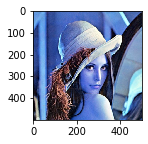

In [5]:
#plt也可以打印图片，但要注意是否为灰度图，以及通道顺序
plt.figure(figsize=(2,2))
plt.imshow(img_ori,cmap='gray')
plt.show()

In [6]:
def my_show(img, size=(3,3)):
    plt.figure(figsize=size)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()

In [7]:
'''定义crop函数和四个参数，其中四个参数分别为：
左上角横坐标x0
左上角纵坐标y0
裁剪的宽度w
裁剪的高度h
'''
def image_crop(img, x0, y0, w, h):
    return img[y0:y0+h, x0:x0+w]

In [8]:
'''
随机裁剪
area_ratio 为裁剪画面的面积占原画面的比例
hw_vari 是扰动占原高宽比的比例范围
hw_delta 裁剪后画面的宽高比扰动的比例
np.random.uniform（low,high） 从一个均匀分布[low, high)中随机采样，
即随机产生个数，lows为上界，hight为下界
'''
def random_crop(img, area_ratio, hw_vari):
    h, w = img.shape[:2]                     # 原图的高和宽
    hw_delta = np.random.uniform(-hw_vari, hw_vari)
    hw_mult = 1 + hw_delta
    
    # 下表进行裁剪，高宽为正数
    # round()方法的作用是对于浮点数进行四舍五入。
    
    w_crop = int(round(w * np.sqrt(area_ratio * hw_mult)))   #
    
    # 裁剪宽度不能大于原图的宽度
    if w_crop > w:
        w_crop = ws
        
    h_crop = int(round(h*np.sqrt(area_ratio / hw_mult)))
    if h_crop > h:
        h_crop = h
        
        
    # numpy.random.randint(low, high=None, size=None, dtype='l')     
    # 函数的作用是，返回一个随机整型数，范围从低（包括）到高（不包括），    
    # 即[low, high)。如果没有写参数high的值，则返回[0,low)的值。
    # 随即产生点（x0,y0）, 随机生成在左上角的位置
    x0 = np.random.randint(0, w - w_crop + 1)
    y0 = np.random.randint(0, h - h_crop + 1)
    
    return image_crop(img, x0, y0, w_crop, h_crop)
    

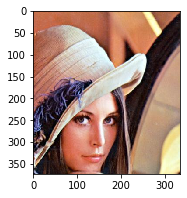

In [9]:
my_show(random_crop(img_ori,0.5,0.7))

In [10]:
'''
定义HSV变换函数
hue_delta为色度变化比例：    色度的变化比例范围（0,360）
sat_delta为饱和度变化比例：  饱和度变化比例范围（0,1）   
val_delta为明度变化值：      明度变化比例范围（0,1）
'''
def HSV_transform(img, hue_delta, sat_delta, val_delta):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV).astype(np.float)
    img_hsv[:, :, 0] = (img_hsv[:, :, 0] + hue_delta) % 180    # H 矩阵发生微小的变化
    img_hsv[:, :, 1] *= sat_delta                              # S 矩阵更新
    img_hsv[:, :, 2] *= val_delta                              # V 矩阵更新
    # 把值赋予 V 矩阵，不断叠乘
    img_hsv[img_hsv > 255] = 255
    return cv2.cvtColor(np.round(img_hsv).astype(np.uint8),cv2.COLOR_HSV2BGR)

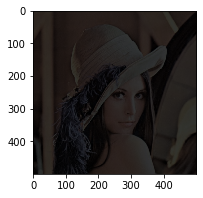

In [11]:
my_show(HSV_transform(img_ori,0.2,0.5,0.2))

In [12]:
#  旋转中心为原图像的中心
def rotation(img, angle, scale):  
    h, w = img.shape[:2]
    angle %= 360   # 旋转角度的周期是360度
    
    # cv2.getRotationMatrix2D(center, angle, scale) 获得仿射矩阵
    # center: 旋转中心, angle: 旋转角度， scale: 缩放因子
    M_rotate = cv2.getRotationMatrix2D((w / 2, h / 2),angle, scale)   
    img_ratate = cv2.warpAffine(img, M_rotate, (w,h))   # 获得旋转后的图片
    return img_ratate
    

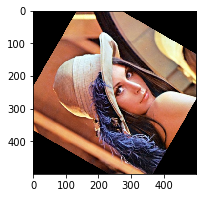

In [13]:
my_show(rotation(img_ori,60,0.9)) 

In [22]:
def perspective_transform(img, row, col): 
    height, width, charnnels = img.shape
    
    # warp
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin -1, width - 1)

    x5 = random.randint(-random_margin, random_margin)
    y5 = random.randint(-random_margin, random_margin)
    x6 = random.randint(width - random_margin - 1, width - 1)
    y6 = random.randint(-random_margin, random_margin)
    x7 = random.randint(width - random_margin - 1, width - 1)
    y7 = random.randint(height - random_margin - 1, height - 1)
    x8 = random.randint(-random_margin, random_margin)
    y8 = random.randint(height - random_margin -1, width - 1)
    
    pts1 = np.float32([[x1,y1],[x2,y2],[x3,y3],[x4,y4]])
    pts2 = np.float32([[x5,y5],[x6,y6],[x7,y7],[x8,y8]])
    M_warp = cv2.getPerspectiveTransform(pts1,pts2)   # 求出透视变换矩阵
    img_warp = cv2.warpPerspective(img, M_warp, (width, height)) # 求得转换后的图像
    return M_warp, img_warp
img = img_ori
M_warp, img_warp = perspective_transform(img, img.shape[0],img.shape[1])
cv2.imshow('lenna',img_warp)
key= cv2.waitKey(0)
if key== 27:
    cv2.destroyAllWindows()        